### This file plots the processed csv files with matplotlib

Note: manually select date and file name in the corresponding section (either cpu, netsend or netrecv)

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np
import pandas as pd

## Adjust date of processed csv files

In [2]:
date = '2018-11-21_18h43'
base_path = '/Users/florianmorath/Desktop/ASL_project/scripts/4_GetsAndMultigets/processed_data/' + date + '/'

In [3]:
def y_fmt(tick_val, pos):
    if tick_val > 1000000:
        val = int(tick_val)/1000000
        return str(val).rstrip('0') + ' M'
    elif tick_val >= 1000:
        val = int(tick_val) / 1000
        return str(val).rstrip('0') + ' k'
    else:
        return tick_val

## CPU utilization plot

In [4]:
# read data into pandas dataframe
file_name = 'dstat_server_cpu_sharded_True.csv'
df_c = pd.read_csv(base_path + file_name)
df_c

,client,worker,sharded,cpu_mean,cpu_std
0,12,64,1:1,21.220192,0.330918
1,12,64,1:3,17.555455,0.175143
2,12,64,1:6,16.087333,0.203010
3,12,64,1:9,15.686371,0.452638


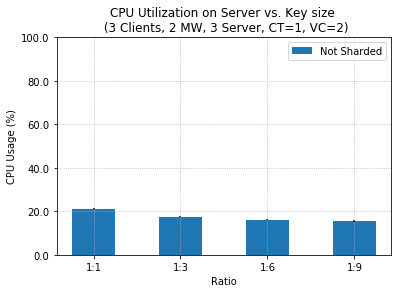

In [5]:
f = plt.figure()
plt.title("CPU Utilization on Server vs. Key size \n (3 Clients, 2 MW, 3 Server, CT=1, VC=2)")

    
vcs = df_c['sharded']
means = df_c['cpu_mean']
stds = df_c['cpu_std']

#plt.bar()
plt.bar(x = vcs, height = means, yerr = stds, label = 'Not Sharded', width=0.5)

plt.grid(linestyle = "dotted")
plt.ylabel("CPU Usage (%)")
plt.xlabel("Ratio")
#plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=100)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/4_GetsAndMultigets/processed_data/"+date+"/"+file_name[:-4]+".png", dpi = 150)

## Network send activity plot

In [10]:
# read data into pandas dataframe
file_name = 'dstat_server_netsend_sharded_True.csv'
df_c = pd.read_csv(base_path + file_name)
df_c

,client,worker,sharded,netsend_mean,netsend_std
0,12,64,1:1,4.888924e+06,126798.853642
1,12,64,1:3,7.416100e+06,28338.793313
2,12,64,1:6,8.584289e+06,84841.852868
3,12,64,1:9,9.037477e+06,29291.344859


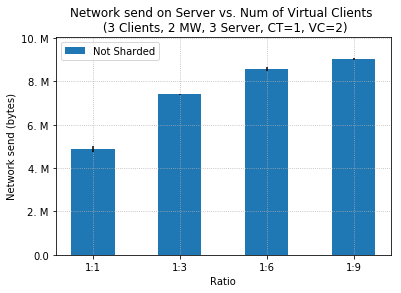

In [11]:
f = plt.figure()
plt.title("Network send on Server vs. Num of Virtual Clients \n (3 Clients, 2 MW, 3 Server, CT=1, VC=2)")

vcs = df_c['sharded']
means = df_c['netsend_mean']
stds = df_c['netsend_std']
    
plt.bar(x = vcs, height = means, yerr = stds, label = 'Not Sharded', width=0.5)

plt.grid(linestyle = "dotted")
plt.ylabel("Network send (bytes)")
plt.xlabel("Ratio")
#plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=1e6+np.max(df_c['netsend_mean']))
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/4_GetsAndMultigets/processed_data/"+date+"/"+file_name[:-4]+".png", dpi = 150)